## Data Preprocessing: Feasture Scaling

1. Rescaling Data
2. Normalizing Data
3. Standardizing Data

[More Information](https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/)


[Data Description](https://www.kaggle.com/uciml/pima-indians-diabetes-database)


### <font color='red'>numerical inputs only. Have to code in data (no categories), Then need to decode on the back side. Each row would have a category row with all options. Applicable cat is 1 and non-applicables are 0. If there are three categories, there are 3 colums, but only one would ever have a 1 in it.</font>

In [1]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values

X = array[:,:8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX=scaler.fit_transform(X)

numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


### <font color='red'>min max scaler makes every value in set between the range. why is that important? Disadvantes: may loose some information, scaling may cause all values to be in one cluster because they are so tiny and close. Scaling with clustering can be problematic</font>

### <font color='red'>also, scaling happens on the training data, not on all the data, and the scaled values in the test set may be different.</font>

In [2]:
# Normalize data (length of 1)
#Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

from sklearn.preprocessing import Normalizer
import pandas
import numpy

dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values

X = array[:,0:8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

numpy.set_printoptions(precision=3)
print(normalizedX[0:5,:])

 

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [3]:
# Standardize data (0 mean, 1 stdev)
# Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

"""
scaled_train =  (train - train_mean) / train_std_deviation
scaled_test = (test - train_mean) / train_std_deviation
"""


import pandas
import numpy
from sklearn.preprocessing import StandardScaler 

dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values

 
X = array[:700,:8]
 
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

std = numpy.std(rescaledX,axis=0)
print(std)
print("\n")


test=scaler.transform(array[700:,:8])

print(test[0:5,:])

std = numpy.std(test,axis=0)
print(std)

[[ 0.646  0.853  0.16   0.912 -0.692  0.215  0.448  1.433]
 [-0.841 -1.104 -0.147  0.538 -0.692 -0.666 -0.371 -0.18 ]
 [ 1.241  1.941 -0.25  -1.272 -0.692 -1.081  0.581 -0.095]
 [-0.841 -0.98  -0.147  0.163  0.122 -0.477 -0.917 -1.03 ]
 [-1.138  0.511 -1.479  0.912  0.763  1.411  5.375 -0.011]]
[1. 1. 1. 1. 1. 1. 1. 1.]


[[-0.543  0.045  0.365  0.413  1.04   0.505  0.021 -0.605]
 [ 0.646  0.139  0.467  0.663 -0.692 -0.54   0.264  1.348]
 [-0.841  1.475  0.979  0.538 -0.692  0.391  1.273  1.603]
 [-0.543  0.263 -3.527 -1.272 -0.692  0.832 -0.51   0.669]
 [ 0.051 -0.328  0.365 -0.024  0.174 -0.439 -1.062 -0.52 ]]
[1.016 0.907 0.879 0.937 0.966 0.892 0.764 0.971]


# Neural Network 

## Feedforward

[Code](https://enlight.nyc/projects/neural-network/)

In [4]:
import numpy as np

# X = (hours sleeping, hours studying), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
y = y/100 # max test score is 100

class Neural_Network(object):
  def __init__(self):
    #parameters
    #2 input values
    self.inputSize = 2
    #1 output var, score
    self.outputSize = 1
    #3 nodes
    self.hiddenSize = 3

    #weights
    #initialize weights randomly, is a matrix
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

NN = Neural_Network()

#defining our output
o = NN.forward(X)

print("Predicted Output: \n" + str(o))
print ("Actual Output: \n" + str(y))

Predicted Output: 
[[0.192]
 [0.216]
 [0.204]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]


# Neural Network 

## Feedforward and Backpropagation



In [5]:
import numpy as np

#this is the test data
# X = (hours studying, hours sleeping), y = score on test, xPredicted = 4 hours studying & 8 hours sleeping (input data for prediction)
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
xPredicted = np.array(([4,8]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
xPredicted = xPredicted/np.amax(xPredicted, axis=0) # maximum of xPredicted (our input data for the prediction)
y = y/100 # max test score is 100

class Neural_Network(object):
  def __init__(self):
  #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

  #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s")

  def predict(self):
    print ("Predicted data based on trained weights: ")
    print ("Input (scaled): \n" + str(xPredicted))
    print ("Output: \n" + str(self.forward(xPredicted)));

NN = Neural_Network()
for i in range(0,10): # trains the NN 1,000 times
  print("# " + str(i) + "\n")
  print("Input (scaled): \n" + str(X))
  print("Actual Output: \n" + str(y))
  print("Predicted Output: \n" + str(NN.forward(X)))
  print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss
  print ("\n")
  NN.train(X, y)

NN.saveWeights()
NN.predict()

# 0

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.598]
 [0.633]
 [0.598]]
Loss: 
0.08013009871075595


# 1

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.633]
 [0.664]
 [0.633]]
Loss: 
0.06230983870082934


# 2

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.662]
 [0.69 ]
 [0.663]]
Loss: 
0.049021730757290154


# 3

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.686]
 [0.712]
 [0.688]]
Loss: 
0.03903490551930175


# 4

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.708]
 [0.73 ]
 [0.71 ]]
Loss: 
0.031456141566098106


# 5

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actua

In [6]:
from sklearn.neural_network import MLPClassifier
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network.multilayer_perceptron:

class MLPClassifier(BaseMultilayerPerceptron, sklearn.base.ClassifierMixin)
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear u

### <font color='red'>what is the advantage or disadvantage when num iter is small or large</font>

### <font color='red'>small num of iterations, fast but may not converge</font>

In [7]:
from sklearn.neural_network import MLPClassifier


dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values
X=array[:,:8]
y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
X=scaler.fit_transform(X)

# rescale the data, use the traditional train/test split
X_train, X_test = X[:700], X[700:]
y_train, y_test = y[:700], y[700:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10000, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1)
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



Iteration 1, loss = 0.69225859
Iteration 2, loss = 0.68286383
Iteration 3, loss = 0.67564925
Iteration 4, loss = 0.66941684
Iteration 5, loss = 0.66401914
Iteration 6, loss = 0.66004404
Iteration 7, loss = 0.65619876
Iteration 8, loss = 0.65268342
Iteration 9, loss = 0.64974644
Iteration 10, loss = 0.64698598
Iteration 11, loss = 0.64431285
Iteration 12, loss = 0.64173960
Iteration 13, loss = 0.63922889
Iteration 14, loss = 0.63679691
Iteration 15, loss = 0.63425251
Iteration 16, loss = 0.63186714
Iteration 17, loss = 0.62935345
Iteration 18, loss = 0.62690308
Iteration 19, loss = 0.62411275
Iteration 20, loss = 0.62153795
Iteration 21, loss = 0.61873835
Iteration 22, loss = 0.61591680
Iteration 23, loss = 0.61303832
Iteration 24, loss = 0.61015721
Iteration 25, loss = 0.60733694
Iteration 26, loss = 0.60470102
Iteration 27, loss = 0.60239766
Iteration 28, loss = 0.59998877
Iteration 29, loss = 0.59782174
Iteration 30, loss = 0.59573785
Iteration 31, loss = 0.59376595
Iteration 32, los

#### In the above code, play on the hyperparameters 

### <font color='red'>any classifier can be made into a regressor</font>

### <font color='red'>output comes with ranges instead of binary/classes. With regression, there are thresholds, because the answer is numeric, not classed, it has ranges</font>

In [8]:
from sklearn.neural_network import MLPRegressor
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network.multilayer_perceptron:

class MLPRegressor(BaseMultilayerPerceptron, sklearn.base.RegressorMixin)
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared-loss using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear unit funct

### <font color='red'>must put seed if not, there are different outpust every time. Don't forget the seed</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

#http://www.machinelearningtutorial.net/2017/01/28/python-scikit-simple-function-approximation/

#don't for get the seed, solutions are differnig without a set seed
np.random.seed(3)
n = 20
x = np.random.uniform(-15, 15, size = n)
#y is a predictor for x, the random thing is noise added to the data
y = x**2 + 2*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

#if verbose false, results won't show
clf = MLPRegressor(alpha=0.001, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')

"""
clf = MLPRegressor(alpha=0.1, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')
"""
a = clf.fit(X, y)

mlp.fit(X_)

Iteration 1, loss = 4848.52190857
Iteration 2, loss = 4843.89158197
Iteration 3, loss = 4839.23966432
Iteration 4, loss = 4834.64868045
Iteration 5, loss = 4830.04038263
Iteration 6, loss = 4825.46677005
Iteration 7, loss = 4820.92877977
Iteration 8, loss = 4816.43800048
Iteration 9, loss = 4811.91425205
Iteration 10, loss = 4807.38578216
Iteration 11, loss = 4802.92887248
Iteration 12, loss = 4798.42461852
Iteration 13, loss = 4793.90009629
Iteration 14, loss = 4789.34307257
Iteration 15, loss = 4784.79121397
Iteration 16, loss = 4780.15660823
Iteration 17, loss = 4775.49576785
Iteration 18, loss = 4770.75743582
Iteration 19, loss = 4765.94968190
Iteration 20, loss = 4761.07802531
Iteration 21, loss = 4756.25792219
Iteration 22, loss = 4751.42509539
Iteration 23, loss = 4746.55002318
Iteration 24, loss = 4741.64422567
Iteration 25, loss = 4736.75596641
Iteration 26, loss = 4731.91045983
Iteration 27, loss = 4726.82709834
Iteration 28, loss = 4721.73534818
Iteration 29, loss = 4716.431

Iteration 241, loss = 3366.58303711
Iteration 242, loss = 3361.57797745
Iteration 243, loss = 3356.73563915
Iteration 244, loss = 3351.77012019
Iteration 245, loss = 3346.90983847
Iteration 246, loss = 3342.01865302
Iteration 247, loss = 3337.13298801
Iteration 248, loss = 3332.24604637
Iteration 249, loss = 3327.42095771
Iteration 250, loss = 3322.67342604
Iteration 251, loss = 3317.85820764
Iteration 252, loss = 3313.00747957
Iteration 253, loss = 3308.30140800
Iteration 254, loss = 3303.52339138
Iteration 255, loss = 3298.72650968
Iteration 256, loss = 3294.04357466
Iteration 257, loss = 3289.30469300
Iteration 258, loss = 3284.60944585
Iteration 259, loss = 3280.04214316
Iteration 260, loss = 3275.22437285
Iteration 261, loss = 3270.57821145
Iteration 262, loss = 3265.98976229
Iteration 263, loss = 3261.33601994
Iteration 264, loss = 3256.68582452
Iteration 265, loss = 3252.22167249
Iteration 266, loss = 3247.53239155
Iteration 267, loss = 3243.00337251
Iteration 268, loss = 3238.4

Iteration 483, loss = 2531.50181561
Iteration 484, loss = 2529.32395928
Iteration 485, loss = 2527.03555184
Iteration 486, loss = 2524.80335171
Iteration 487, loss = 2522.67426085
Iteration 488, loss = 2520.45293748
Iteration 489, loss = 2518.24747836
Iteration 490, loss = 2516.07418463
Iteration 491, loss = 2513.88770753
Iteration 492, loss = 2511.78412372
Iteration 493, loss = 2509.52677165
Iteration 494, loss = 2507.42426162
Iteration 495, loss = 2505.31041094
Iteration 496, loss = 2503.16405630
Iteration 497, loss = 2501.01136655
Iteration 498, loss = 2498.92817765
Iteration 499, loss = 2496.79389463
Iteration 500, loss = 2494.73912224
Iteration 501, loss = 2492.66524511
Iteration 502, loss = 2490.51160950
Iteration 503, loss = 2488.44724632
Iteration 504, loss = 2486.38507528
Iteration 505, loss = 2484.34870503
Iteration 506, loss = 2482.25815729
Iteration 507, loss = 2480.23072804
Iteration 508, loss = 2478.24785142
Iteration 509, loss = 2476.12858141
Iteration 510, loss = 2474.1

Iteration 729, loss = 2194.85987136
Iteration 730, loss = 2194.21416840
Iteration 731, loss = 2193.56766335
Iteration 732, loss = 2192.92086497
Iteration 733, loss = 2192.29420366
Iteration 734, loss = 2191.63269924
Iteration 735, loss = 2191.02004412
Iteration 736, loss = 2190.38096179
Iteration 737, loss = 2189.77185685
Iteration 738, loss = 2189.12936344
Iteration 739, loss = 2188.49773090
Iteration 740, loss = 2187.90739786
Iteration 741, loss = 2187.29199190
Iteration 742, loss = 2186.66617062
Iteration 743, loss = 2186.11402926
Iteration 744, loss = 2185.51362356
Iteration 745, loss = 2184.88033557
Iteration 746, loss = 2184.31383226
Iteration 747, loss = 2183.73755647
Iteration 748, loss = 2183.13602016
Iteration 749, loss = 2182.57794713
Iteration 750, loss = 2182.00355843
Iteration 751, loss = 2181.42843260
Iteration 752, loss = 2180.85641194
Iteration 753, loss = 2180.31588941
Iteration 754, loss = 2179.74364105
Iteration 755, loss = 2179.21322833
Iteration 756, loss = 2178.6

Iteration 977, loss = 2118.90307573
Iteration 978, loss = 2118.77306243
Iteration 979, loss = 2118.64150404
Iteration 980, loss = 2118.51995297
Iteration 981, loss = 2118.39672333
Iteration 982, loss = 2118.24394695
Iteration 983, loss = 2118.11303967
Iteration 984, loss = 2117.98160887
Iteration 985, loss = 2117.85589691
Iteration 986, loss = 2117.72125184
Iteration 987, loss = 2117.59011944
Iteration 988, loss = 2117.46539387
Iteration 989, loss = 2117.33020204
Iteration 990, loss = 2117.20817397
Iteration 991, loss = 2117.09400731
Iteration 992, loss = 2116.95421582
Iteration 993, loss = 2116.81879754
Iteration 994, loss = 2116.69955178
Iteration 995, loss = 2116.55962355
Iteration 996, loss = 2116.44305919
Iteration 997, loss = 2116.31753481
Iteration 998, loss = 2116.18341608
Iteration 999, loss = 2116.05809418
Iteration 1000, loss = 2115.92966690
Iteration 1001, loss = 2115.80525508
Iteration 1002, loss = 2115.67360818
Iteration 1003, loss = 2115.54857275
Iteration 1004, loss = 2

Iteration 1205, loss = 2091.02366153
Iteration 1206, loss = 2090.90951614
Iteration 1207, loss = 2090.78675902
Iteration 1208, loss = 2090.66244803
Iteration 1209, loss = 2090.56116233
Iteration 1210, loss = 2090.42922220
Iteration 1211, loss = 2090.30389982
Iteration 1212, loss = 2090.18953378
Iteration 1213, loss = 2090.07045701
Iteration 1214, loss = 2089.94334445
Iteration 1215, loss = 2089.82356893
Iteration 1216, loss = 2089.70305012
Iteration 1217, loss = 2089.58414438
Iteration 1218, loss = 2089.46126169
Iteration 1219, loss = 2089.33891571
Iteration 1220, loss = 2089.22634991
Iteration 1221, loss = 2089.09877650
Iteration 1222, loss = 2088.97862625
Iteration 1223, loss = 2088.86898298
Iteration 1224, loss = 2088.73978135
Iteration 1225, loss = 2088.63028348
Iteration 1226, loss = 2088.51064559
Iteration 1227, loss = 2088.38195220
Iteration 1228, loss = 2088.26119287
Iteration 1229, loss = 2088.17419951
Iteration 1230, loss = 2088.01900084
Iteration 1231, loss = 2087.91908527
I

Iteration 1433, loss = 2063.95877075
Iteration 1434, loss = 2063.84310090
Iteration 1435, loss = 2063.73392274
Iteration 1436, loss = 2063.60619124
Iteration 1437, loss = 2063.48803363
Iteration 1438, loss = 2063.38090734
Iteration 1439, loss = 2063.25609659
Iteration 1440, loss = 2063.14034834
Iteration 1441, loss = 2063.01968338
Iteration 1442, loss = 2062.90307275
Iteration 1443, loss = 2062.79244634
Iteration 1444, loss = 2062.67258607
Iteration 1445, loss = 2062.55420301
Iteration 1446, loss = 2062.44347163
Iteration 1447, loss = 2062.32555808
Iteration 1448, loss = 2062.20756229
Iteration 1449, loss = 2062.08535797
Iteration 1450, loss = 2061.97189251
Iteration 1451, loss = 2061.85848752
Iteration 1452, loss = 2061.73677365
Iteration 1453, loss = 2061.62076676
Iteration 1454, loss = 2061.51051760
Iteration 1455, loss = 2061.40952273
Iteration 1456, loss = 2061.27164535
Iteration 1457, loss = 2061.15934280
Iteration 1458, loss = 2061.06548622
Iteration 1459, loss = 2060.92086031
I

Iteration 1665, loss = 2037.27410018
Iteration 1666, loss = 2037.16264771
Iteration 1667, loss = 2037.06195925
Iteration 1668, loss = 2036.93746540
Iteration 1669, loss = 2036.83464591
Iteration 1670, loss = 2036.71293202
Iteration 1671, loss = 2036.59844801
Iteration 1672, loss = 2036.48451236
Iteration 1673, loss = 2036.37329845
Iteration 1674, loss = 2036.27721643
Iteration 1675, loss = 2036.14814786
Iteration 1676, loss = 2036.03428164
Iteration 1677, loss = 2035.92831243
Iteration 1678, loss = 2035.81016476
Iteration 1679, loss = 2035.70132978
Iteration 1680, loss = 2035.58667686
Iteration 1681, loss = 2035.46919575
Iteration 1682, loss = 2035.36147615
Iteration 1683, loss = 2035.25613052
Iteration 1684, loss = 2035.13367843
Iteration 1685, loss = 2035.02433584
Iteration 1686, loss = 2034.91931713
Iteration 1687, loss = 2034.80176786
Iteration 1688, loss = 2034.68282689
Iteration 1689, loss = 2034.57497559
Iteration 1690, loss = 2034.45189494
Iteration 1691, loss = 2034.34574245
I

Iteration 1902, loss = 2010.93070080
Iteration 1903, loss = 2010.82265803
Iteration 1904, loss = 2010.71485949
Iteration 1905, loss = 2010.60601144
Iteration 1906, loss = 2010.49784561
Iteration 1907, loss = 2010.38741118
Iteration 1908, loss = 2010.29355851
Iteration 1909, loss = 2010.17000857
Iteration 1910, loss = 2010.05905528
Iteration 1911, loss = 2009.94274151
Iteration 1912, loss = 2009.83589814
Iteration 1913, loss = 2009.73570264
Iteration 1914, loss = 2009.62266751
Iteration 1915, loss = 2009.52703762
Iteration 1916, loss = 2009.40428010
Iteration 1917, loss = 2009.29221912
Iteration 1918, loss = 2009.18573474
Iteration 1919, loss = 2009.08085195
Iteration 1920, loss = 2008.96862657
Iteration 1921, loss = 2008.86993073
Iteration 1922, loss = 2008.74869975
Iteration 1923, loss = 2008.64288812
Iteration 1924, loss = 2008.52705812
Iteration 1925, loss = 2008.41675338
Iteration 1926, loss = 2008.31949419
Iteration 1927, loss = 2008.20208939
Iteration 1928, loss = 2008.10077592
I

Iteration 2142, loss = 1985.09545626
Iteration 2143, loss = 1984.97784189
Iteration 2144, loss = 1984.90028867
Iteration 2145, loss = 1984.76324002
Iteration 2146, loss = 1984.65878401
Iteration 2147, loss = 1984.57521714
Iteration 2148, loss = 1984.45309769
Iteration 2149, loss = 1984.36094030
Iteration 2150, loss = 1984.23950774
Iteration 2151, loss = 1984.13187309
Iteration 2152, loss = 1984.02867513
Iteration 2153, loss = 1983.92467114
Iteration 2154, loss = 1983.82336501
Iteration 2155, loss = 1983.70863335
Iteration 2156, loss = 1983.60335765
Iteration 2157, loss = 1983.49831526
Iteration 2158, loss = 1983.40943959
Iteration 2159, loss = 1983.28857564
Iteration 2160, loss = 1983.18323297
Iteration 2161, loss = 1983.06882356
Iteration 2162, loss = 1982.97232737
Iteration 2163, loss = 1982.86727920
Iteration 2164, loss = 1982.76716807
Iteration 2165, loss = 1982.65379614
Iteration 2166, loss = 1982.56117744
Iteration 2167, loss = 1982.44156786
Iteration 2168, loss = 1982.32686426
I

Iteration 2386, loss = 1959.58908872
Iteration 2387, loss = 1959.47951744
Iteration 2388, loss = 1959.37079099
Iteration 2389, loss = 1959.25951331
Iteration 2390, loss = 1959.16258834
Iteration 2391, loss = 1959.06251363
Iteration 2392, loss = 1958.96042010
Iteration 2393, loss = 1958.84508534
Iteration 2394, loss = 1958.76583101
Iteration 2395, loss = 1958.64126628
Iteration 2396, loss = 1958.53833464
Iteration 2397, loss = 1958.45314311
Iteration 2398, loss = 1958.34396999
Iteration 2399, loss = 1958.23606023
Iteration 2400, loss = 1958.12841083
Iteration 2401, loss = 1958.02597303
Iteration 2402, loss = 1957.92625467
Iteration 2403, loss = 1957.81617959
Iteration 2404, loss = 1957.73165778
Iteration 2405, loss = 1957.62203125
Iteration 2406, loss = 1957.51694437
Iteration 2407, loss = 1957.41502321
Iteration 2408, loss = 1957.30406824
Iteration 2409, loss = 1957.20359536
Iteration 2410, loss = 1957.12295729
Iteration 2411, loss = 1957.00546147
Iteration 2412, loss = 1956.89545114
I

Iteration 2620, loss = 1935.68724764
Iteration 2621, loss = 1935.57963417
Iteration 2622, loss = 1935.47420634
Iteration 2623, loss = 1935.37514762
Iteration 2624, loss = 1935.29331659
Iteration 2625, loss = 1935.18346324
Iteration 2626, loss = 1935.08850890
Iteration 2627, loss = 1934.96799675
Iteration 2628, loss = 1934.87011229
Iteration 2629, loss = 1934.76895939
Iteration 2630, loss = 1934.67072911
Iteration 2631, loss = 1934.57990826
Iteration 2632, loss = 1934.46893918
Iteration 2633, loss = 1934.36749692
Iteration 2634, loss = 1934.25737662
Iteration 2635, loss = 1934.23531625
Iteration 2636, loss = 1934.06051593
Iteration 2637, loss = 1933.96069317
Iteration 2638, loss = 1933.91855331
Iteration 2639, loss = 1933.76499109
Iteration 2640, loss = 1933.66137520
Iteration 2641, loss = 1933.55432567
Iteration 2642, loss = 1933.46825275
Iteration 2643, loss = 1933.36778912
Iteration 2644, loss = 1933.26078305
Iteration 2645, loss = 1933.15153316
Iteration 2646, loss = 1933.05029309
I

Iteration 2853, loss = 1912.20010671
Iteration 2854, loss = 1912.09966009
Iteration 2855, loss = 1912.01419677
Iteration 2856, loss = 1911.89508124
Iteration 2857, loss = 1911.83074652
Iteration 2858, loss = 1911.73620534
Iteration 2859, loss = 1911.58500297
Iteration 2860, loss = 1911.51400655
Iteration 2861, loss = 1911.39116172
Iteration 2862, loss = 1911.29175082
Iteration 2863, loss = 1911.19416284
Iteration 2864, loss = 1911.10617993
Iteration 2865, loss = 1910.99498154
Iteration 2866, loss = 1910.93464001
Iteration 2867, loss = 1910.86357074
Iteration 2868, loss = 1910.68929674
Iteration 2869, loss = 1910.57897448
Iteration 2870, loss = 1910.50522416
Iteration 2871, loss = 1910.38964669
Iteration 2872, loss = 1910.28826250
Iteration 2873, loss = 1910.18389097
Iteration 2874, loss = 1910.09333523
Iteration 2875, loss = 1909.98544708
Iteration 2876, loss = 1909.88980055
Iteration 2877, loss = 1909.78454529
Iteration 2878, loss = 1909.68919095
Iteration 2879, loss = 1909.60405233
I

Iteration 3077, loss = 1889.56081206
Iteration 3078, loss = 1889.49435937
Iteration 3079, loss = 1889.37530915
Iteration 3080, loss = 1889.26872047
Iteration 3081, loss = 1889.13735936
Iteration 3082, loss = 1889.03573614
Iteration 3083, loss = 1888.94914048
Iteration 3084, loss = 1888.85561119
Iteration 3085, loss = 1888.80662017
Iteration 3086, loss = 1888.62677750
Iteration 3087, loss = 1888.53109219
Iteration 3088, loss = 1888.42519373
Iteration 3089, loss = 1888.34818347
Iteration 3090, loss = 1888.26473816
Iteration 3091, loss = 1888.11708921
Iteration 3092, loss = 1888.00481487
Iteration 3093, loss = 1888.00325248
Iteration 3094, loss = 1887.91831648
Iteration 3095, loss = 1887.74529128
Iteration 3096, loss = 1887.63997983
Iteration 3097, loss = 1887.51630333
Iteration 3098, loss = 1887.46407688
Iteration 3099, loss = 1887.30848851
Iteration 3100, loss = 1887.21035616
Iteration 3101, loss = 1887.10946366
Iteration 3102, loss = 1886.98089636
Iteration 3103, loss = 1886.92093980
I

Iteration 3313, loss = 1865.06636795
Iteration 3314, loss = 1864.92164088
Iteration 3315, loss = 1864.80180991
Iteration 3316, loss = 1864.71885082
Iteration 3317, loss = 1864.66915851
Iteration 3318, loss = 1864.54032975
Iteration 3319, loss = 1864.38803570
Iteration 3320, loss = 1864.45812624
Iteration 3321, loss = 1864.21378914
Iteration 3322, loss = 1864.06999508
Iteration 3323, loss = 1864.03329458
Iteration 3324, loss = 1863.87162265
Iteration 3325, loss = 1863.79824760
Iteration 3326, loss = 1863.66742021
Iteration 3327, loss = 1863.57500324
Iteration 3328, loss = 1863.55065050
Iteration 3329, loss = 1863.33679472
Iteration 3330, loss = 1863.22341894
Iteration 3331, loss = 1863.12232149
Iteration 3332, loss = 1863.02993360
Iteration 3333, loss = 1862.93307138
Iteration 3334, loss = 1862.79869344
Iteration 3335, loss = 1862.74368809
Iteration 3336, loss = 1862.58043408
Iteration 3337, loss = 1862.45296940
Iteration 3338, loss = 1862.45249463
Iteration 3339, loss = 1862.31238196
I

Iteration 3552, loss = 1838.16531363
Iteration 3553, loss = 1838.02904925
Iteration 3554, loss = 1837.91474118
Iteration 3555, loss = 1837.82461477
Iteration 3556, loss = 1837.71949284
Iteration 3557, loss = 1837.55948967
Iteration 3558, loss = 1837.50376697
Iteration 3559, loss = 1837.27983148
Iteration 3560, loss = 1837.15889100
Iteration 3561, loss = 1837.01036537
Iteration 3562, loss = 1837.01805656
Iteration 3563, loss = 1836.79653579
Iteration 3564, loss = 1836.66171533
Iteration 3565, loss = 1836.54584563
Iteration 3566, loss = 1836.36042926
Iteration 3567, loss = 1836.23280782
Iteration 3568, loss = 1836.16433258
Iteration 3569, loss = 1835.97190573
Iteration 3570, loss = 1835.84135869
Iteration 3571, loss = 1835.71781721
Iteration 3572, loss = 1835.59387941
Iteration 3573, loss = 1835.43759277
Iteration 3574, loss = 1835.33690968
Iteration 3575, loss = 1835.26988241
Iteration 3576, loss = 1835.01637989
Iteration 3577, loss = 1834.98634341
Iteration 3578, loss = 1834.82554703
I

Iteration 3784, loss = 1718.77811019
Iteration 3785, loss = 1718.21945928
Iteration 3786, loss = 1717.80385684
Iteration 3787, loss = 1717.36589285
Iteration 3788, loss = 1716.92524670
Iteration 3789, loss = 1716.45135996
Iteration 3790, loss = 1716.19979610
Iteration 3791, loss = 1715.57019842
Iteration 3792, loss = 1715.14052197
Iteration 3793, loss = 1714.70743121
Iteration 3794, loss = 1714.32287586
Iteration 3795, loss = 1713.89732227
Iteration 3796, loss = 1713.39630504
Iteration 3797, loss = 1712.95665851
Iteration 3798, loss = 1712.57021571
Iteration 3799, loss = 1712.09080104
Iteration 3800, loss = 1711.72067093
Iteration 3801, loss = 1711.27251798
Iteration 3802, loss = 1710.84908180
Iteration 3803, loss = 1710.39809981
Iteration 3804, loss = 1709.96276636
Iteration 3805, loss = 1709.65260946
Iteration 3806, loss = 1709.19690453
Iteration 3807, loss = 1708.70382845
Iteration 3808, loss = 1708.30500572
Iteration 3809, loss = 1707.96440411
Iteration 3810, loss = 1707.54824563
I

Iteration 4021, loss = 1632.41239486
Iteration 4022, loss = 1632.09427468
Iteration 4023, loss = 1631.73863675
Iteration 4024, loss = 1631.43509325
Iteration 4025, loss = 1631.09307480
Iteration 4026, loss = 1630.76570544
Iteration 4027, loss = 1630.44943444
Iteration 4028, loss = 1630.21538091
Iteration 4029, loss = 1629.91618135
Iteration 4030, loss = 1629.50264083
Iteration 4031, loss = 1629.16911449
Iteration 4032, loss = 1628.81539967
Iteration 4033, loss = 1628.60366856
Iteration 4034, loss = 1628.26423260
Iteration 4035, loss = 1628.00802219
Iteration 4036, loss = 1627.55723226
Iteration 4037, loss = 1627.39726127
Iteration 4038, loss = 1626.95490123
Iteration 4039, loss = 1626.59556928
Iteration 4040, loss = 1626.28854907
Iteration 4041, loss = 1625.99895878
Iteration 4042, loss = 1625.70167596
Iteration 4043, loss = 1625.34659789
Iteration 4044, loss = 1625.05957101
Iteration 4045, loss = 1624.74172082
Iteration 4046, loss = 1624.35030067
Iteration 4047, loss = 1624.07791160
I

Iteration 4268, loss = 1478.03375391
Iteration 4269, loss = 1477.48044595
Iteration 4270, loss = 1477.07615164
Iteration 4271, loss = 1476.36327303
Iteration 4272, loss = 1475.81638087
Iteration 4273, loss = 1475.26649569
Iteration 4274, loss = 1474.69071686
Iteration 4275, loss = 1474.23926356
Iteration 4276, loss = 1473.59246681
Iteration 4277, loss = 1473.02756502
Iteration 4278, loss = 1472.44444701
Iteration 4279, loss = 1471.93003939
Iteration 4280, loss = 1471.42272643
Iteration 4281, loss = 1470.78027806
Iteration 4282, loss = 1470.27591666
Iteration 4283, loss = 1469.79799496
Iteration 4284, loss = 1469.15143294
Iteration 4285, loss = 1468.62097535
Iteration 4286, loss = 1468.11421191
Iteration 4287, loss = 1467.59307103
Iteration 4288, loss = 1466.97656098
Iteration 4289, loss = 1466.44588892
Iteration 4290, loss = 1466.08967018
Iteration 4291, loss = 1465.36023610
Iteration 4292, loss = 1464.82512762
Iteration 4293, loss = 1464.26187338
Iteration 4294, loss = 1463.74274836
I

Iteration 4491, loss = 1301.77549845
Iteration 4492, loss = 1301.06184924
Iteration 4493, loss = 1300.37837408
Iteration 4494, loss = 1299.70926228
Iteration 4495, loss = 1299.01529314
Iteration 4496, loss = 1298.33982015
Iteration 4497, loss = 1297.70248039
Iteration 4498, loss = 1296.99811442
Iteration 4499, loss = 1296.33536095
Iteration 4500, loss = 1295.68254339
Iteration 4501, loss = 1295.00571458
Iteration 4502, loss = 1294.34994809
Iteration 4503, loss = 1293.69807172
Iteration 4504, loss = 1293.02875552
Iteration 4505, loss = 1292.35856306
Iteration 4506, loss = 1291.80321372
Iteration 4507, loss = 1291.05789841
Iteration 4508, loss = 1290.40825728
Iteration 4509, loss = 1289.76535531
Iteration 4510, loss = 1289.14440859
Iteration 4511, loss = 1288.43066609
Iteration 4512, loss = 1287.79663798
Iteration 4513, loss = 1287.14395398
Iteration 4514, loss = 1286.48250243
Iteration 4515, loss = 1285.88826661
Iteration 4516, loss = 1285.20860114
Iteration 4517, loss = 1284.56427179
I

Iteration 4713, loss = 1176.34533925
Iteration 4714, loss = 1175.78920148
Iteration 4715, loss = 1175.38047018
Iteration 4716, loss = 1174.88356353
Iteration 4717, loss = 1174.34550527
Iteration 4718, loss = 1173.84273891
Iteration 4719, loss = 1173.36098064
Iteration 4720, loss = 1172.90471465
Iteration 4721, loss = 1172.40708244
Iteration 4722, loss = 1171.94561442
Iteration 4723, loss = 1171.49503911
Iteration 4724, loss = 1170.94453035
Iteration 4725, loss = 1170.45279681
Iteration 4726, loss = 1169.95422223
Iteration 4727, loss = 1169.56420446
Iteration 4728, loss = 1168.99323997
Iteration 4729, loss = 1168.50159430
Iteration 4730, loss = 1168.04752446
Iteration 4731, loss = 1167.56022621
Iteration 4732, loss = 1167.05257941
Iteration 4733, loss = 1166.63939301
Iteration 4734, loss = 1166.11079721
Iteration 4735, loss = 1165.63726010
Iteration 4736, loss = 1165.17660132
Iteration 4737, loss = 1164.66083616
Iteration 4738, loss = 1164.18483730
Iteration 4739, loss = 1163.74976475
I

Iteration 4952, loss = 1070.28536787
Iteration 4953, loss = 1069.79661791
Iteration 4954, loss = 1069.41318306
Iteration 4955, loss = 1069.05564562
Iteration 4956, loss = 1068.62828105
Iteration 4957, loss = 1068.20671699
Iteration 4958, loss = 1067.79309742
Iteration 4959, loss = 1067.48171888
Iteration 4960, loss = 1067.08173992
Iteration 4961, loss = 1066.64138277
Iteration 4962, loss = 1066.17192662
Iteration 4963, loss = 1065.77927725
Iteration 4964, loss = 1065.38110164
Iteration 4965, loss = 1064.98241338
Iteration 4966, loss = 1064.55770634
Iteration 4967, loss = 1064.22779388
Iteration 4968, loss = 1063.78281812
Iteration 4969, loss = 1063.38483450
Iteration 4970, loss = 1062.94740775
Iteration 4971, loss = 1062.57576391
Iteration 4972, loss = 1062.16778154
Iteration 4973, loss = 1061.79733981
Iteration 4974, loss = 1061.38462222
Iteration 4975, loss = 1060.97374422
Iteration 4976, loss = 1060.56628406
Iteration 4977, loss = 1060.16098283
Iteration 4978, loss = 1059.84171943
I

Iteration 5195, loss = 978.86645402
Iteration 5196, loss = 978.45682835
Iteration 5197, loss = 978.16967524
Iteration 5198, loss = 977.76312916
Iteration 5199, loss = 977.41711113
Iteration 5200, loss = 977.10009285
Iteration 5201, loss = 976.79469991
Iteration 5202, loss = 976.36859125
Iteration 5203, loss = 976.01589741
Iteration 5204, loss = 975.67240849
Iteration 5205, loss = 975.34755830
Iteration 5206, loss = 974.99465133
Iteration 5207, loss = 974.62681452
Iteration 5208, loss = 974.32790242
Iteration 5209, loss = 973.94557697
Iteration 5210, loss = 973.59443957
Iteration 5211, loss = 973.26866767
Iteration 5212, loss = 972.91328679
Iteration 5213, loss = 972.55706803
Iteration 5214, loss = 972.21558970
Iteration 5215, loss = 971.86940125
Iteration 5216, loss = 971.52236794
Iteration 5217, loss = 971.20796411
Iteration 5218, loss = 970.84389667
Iteration 5219, loss = 970.45308388
Iteration 5220, loss = 970.18227714
Iteration 5221, loss = 969.77732488
Iteration 5222, loss = 969.5

Iteration 5424, loss = 903.30653184
Iteration 5425, loss = 903.00991940
Iteration 5426, loss = 902.73628504
Iteration 5427, loss = 902.42290602
Iteration 5428, loss = 902.09052898
Iteration 5429, loss = 901.76677460
Iteration 5430, loss = 901.53156855
Iteration 5431, loss = 901.21868532
Iteration 5432, loss = 900.82295011
Iteration 5433, loss = 900.54625179
Iteration 5434, loss = 900.27637646
Iteration 5435, loss = 899.91878102
Iteration 5436, loss = 899.73001757
Iteration 5437, loss = 899.39679745
Iteration 5438, loss = 898.98432401
Iteration 5439, loss = 898.70455825
Iteration 5440, loss = 898.42274276
Iteration 5441, loss = 898.07281343
Iteration 5442, loss = 897.76710889
Iteration 5443, loss = 897.47794220
Iteration 5444, loss = 897.15381263
Iteration 5445, loss = 896.82839518
Iteration 5446, loss = 896.52729274
Iteration 5447, loss = 896.21399114
Iteration 5448, loss = 895.93337365
Iteration 5449, loss = 895.64216240
Iteration 5450, loss = 895.29315530
Iteration 5451, loss = 894.9

Iteration 5662, loss = 833.40770402
Iteration 5663, loss = 833.09771690
Iteration 5664, loss = 832.81990046
Iteration 5665, loss = 832.63450428
Iteration 5666, loss = 832.25121762
Iteration 5667, loss = 831.98347502
Iteration 5668, loss = 831.69733975
Iteration 5669, loss = 831.47943371
Iteration 5670, loss = 831.21664033
Iteration 5671, loss = 830.90532172
Iteration 5672, loss = 830.57971079
Iteration 5673, loss = 830.32176512
Iteration 5674, loss = 830.06059339
Iteration 5675, loss = 829.83142092
Iteration 5676, loss = 829.50100734
Iteration 5677, loss = 829.26007808
Iteration 5678, loss = 828.92532557
Iteration 5679, loss = 828.63564439
Iteration 5680, loss = 828.40627716
Iteration 5681, loss = 828.10652018
Iteration 5682, loss = 827.82916798
Iteration 5683, loss = 827.61508541
Iteration 5684, loss = 827.25522573
Iteration 5685, loss = 826.98549859
Iteration 5686, loss = 826.77682321
Iteration 5687, loss = 826.43224142
Iteration 5688, loss = 826.18158975
Iteration 5689, loss = 825.9

Iteration 5904, loss = 744.99994229
Iteration 5905, loss = 744.34316729
Iteration 5906, loss = 743.61419583
Iteration 5907, loss = 742.99922069
Iteration 5908, loss = 742.29752656
Iteration 5909, loss = 741.73181303
Iteration 5910, loss = 741.02538726
Iteration 5911, loss = 740.35522527
Iteration 5912, loss = 739.72837760
Iteration 5913, loss = 739.07560727
Iteration 5914, loss = 738.46029464
Iteration 5915, loss = 737.83666780
Iteration 5916, loss = 737.22872387
Iteration 5917, loss = 736.61871694
Iteration 5918, loss = 736.00528739
Iteration 5919, loss = 735.44131664
Iteration 5920, loss = 734.82342139
Iteration 5921, loss = 734.34998321
Iteration 5922, loss = 733.61048682
Iteration 5923, loss = 733.04290282
Iteration 5924, loss = 732.43906223
Iteration 5925, loss = 731.86129401
Iteration 5926, loss = 731.29628217
Iteration 5927, loss = 730.72123156
Iteration 5928, loss = 730.16897115
Iteration 5929, loss = 729.60524995
Iteration 5930, loss = 729.02244266
Iteration 5931, loss = 728.4

Iteration 6147, loss = 638.46810403
Iteration 6148, loss = 638.12283413
Iteration 6149, loss = 637.79704961
Iteration 6150, loss = 637.46213532
Iteration 6151, loss = 637.08848230
Iteration 6152, loss = 636.73822831
Iteration 6153, loss = 636.41215243
Iteration 6154, loss = 636.03616841
Iteration 6155, loss = 635.70773755
Iteration 6156, loss = 635.37738302
Iteration 6157, loss = 634.99953014
Iteration 6158, loss = 634.65608362
Iteration 6159, loss = 634.31582712
Iteration 6160, loss = 633.97481865
Iteration 6161, loss = 633.68307183
Iteration 6162, loss = 633.28694042
Iteration 6163, loss = 632.94603775
Iteration 6164, loss = 632.60980149
Iteration 6165, loss = 632.27078350
Iteration 6166, loss = 631.95970295
Iteration 6167, loss = 631.58327774
Iteration 6168, loss = 631.24996394
Iteration 6169, loss = 630.94831252
Iteration 6170, loss = 630.55987772
Iteration 6171, loss = 630.25056112
Iteration 6172, loss = 629.90957747
Iteration 6173, loss = 629.58547341
Iteration 6174, loss = 629.2

Iteration 6398, loss = 559.10788814
Iteration 6399, loss = 558.82088766
Iteration 6400, loss = 558.51025286
Iteration 6401, loss = 558.21145444
Iteration 6402, loss = 557.93247634
Iteration 6403, loss = 557.55588851
Iteration 6404, loss = 557.27054801
Iteration 6405, loss = 556.93776984
Iteration 6406, loss = 556.64290193
Iteration 6407, loss = 556.33742568
Iteration 6408, loss = 556.00341848
Iteration 6409, loss = 555.71113189
Iteration 6410, loss = 555.40114427
Iteration 6411, loss = 555.06445774
Iteration 6412, loss = 554.70602125
Iteration 6413, loss = 554.34852620
Iteration 6414, loss = 554.00572247
Iteration 6415, loss = 553.65695019
Iteration 6416, loss = 553.30762965
Iteration 6417, loss = 552.95402185
Iteration 6418, loss = 552.70433106
Iteration 6419, loss = 552.20258506
Iteration 6420, loss = 551.89300144
Iteration 6421, loss = 551.47671203
Iteration 6422, loss = 551.06850387
Iteration 6423, loss = 550.64799077
Iteration 6424, loss = 550.24211362
Iteration 6425, loss = 549.8

Iteration 6646, loss = 446.58558196
Iteration 6647, loss = 446.23451493
Iteration 6648, loss = 445.94465337
Iteration 6649, loss = 445.55964311
Iteration 6650, loss = 445.24705475
Iteration 6651, loss = 444.87316585
Iteration 6652, loss = 444.53091815
Iteration 6653, loss = 444.24384999
Iteration 6654, loss = 443.88453939
Iteration 6655, loss = 443.55569003
Iteration 6656, loss = 443.18327364
Iteration 6657, loss = 442.85920458
Iteration 6658, loss = 442.50025248
Iteration 6659, loss = 442.27712017
Iteration 6660, loss = 441.86811752
Iteration 6661, loss = 441.50305251
Iteration 6662, loss = 441.16252389
Iteration 6663, loss = 440.86303291
Iteration 6664, loss = 440.52057638
Iteration 6665, loss = 440.17073653
Iteration 6666, loss = 439.83089850
Iteration 6667, loss = 439.49615851
Iteration 6668, loss = 439.16885256
Iteration 6669, loss = 438.82168618
Iteration 6670, loss = 438.50357679
Iteration 6671, loss = 438.18104094
Iteration 6672, loss = 437.83419192
Iteration 6673, loss = 437.5

Iteration 6874, loss = 377.41233569
Iteration 6875, loss = 377.13196818
Iteration 6876, loss = 376.88057907
Iteration 6877, loss = 376.59790380
Iteration 6878, loss = 376.34680736
Iteration 6879, loss = 376.02697992
Iteration 6880, loss = 375.75779088
Iteration 6881, loss = 375.49451098
Iteration 6882, loss = 375.23698598
Iteration 6883, loss = 374.94594443
Iteration 6884, loss = 374.67492671
Iteration 6885, loss = 374.40881450
Iteration 6886, loss = 374.15754633
Iteration 6887, loss = 373.87729697
Iteration 6888, loss = 373.59676137
Iteration 6889, loss = 373.34186086
Iteration 6890, loss = 373.04465966
Iteration 6891, loss = 372.79548710
Iteration 6892, loss = 372.51868715
Iteration 6893, loss = 372.27582568
Iteration 6894, loss = 372.00622349
Iteration 6895, loss = 371.70319447
Iteration 6896, loss = 371.42477165
Iteration 6897, loss = 371.15677160
Iteration 6898, loss = 370.88455695
Iteration 6899, loss = 370.60215016
Iteration 6900, loss = 370.37785081
Iteration 6901, loss = 370.0

Iteration 7103, loss = 319.45408547
Iteration 7104, loss = 319.20286729
Iteration 7105, loss = 318.96895086
Iteration 7106, loss = 318.72345076
Iteration 7107, loss = 318.49605668
Iteration 7108, loss = 318.26324799
Iteration 7109, loss = 318.06048190
Iteration 7110, loss = 317.80717006
Iteration 7111, loss = 317.61283997
Iteration 7112, loss = 317.33271047
Iteration 7113, loss = 317.10673094
Iteration 7114, loss = 316.86699288
Iteration 7115, loss = 316.63721944
Iteration 7116, loss = 316.40030759
Iteration 7117, loss = 316.16001996
Iteration 7118, loss = 315.93162189
Iteration 7119, loss = 315.72409365
Iteration 7120, loss = 315.47278975
Iteration 7121, loss = 315.24349055
Iteration 7122, loss = 315.03657609
Iteration 7123, loss = 314.80197523
Iteration 7124, loss = 314.55782461
Iteration 7125, loss = 314.31347136
Iteration 7126, loss = 314.08642485
Iteration 7127, loss = 313.84780220
Iteration 7128, loss = 313.61781470
Iteration 7129, loss = 313.38174746
Iteration 7130, loss = 313.1

Iteration 7336, loss = 268.54135186
Iteration 7337, loss = 268.41508338
Iteration 7338, loss = 268.14548405
Iteration 7339, loss = 267.94967114
Iteration 7340, loss = 267.75172643
Iteration 7341, loss = 267.52527550
Iteration 7342, loss = 267.31537074
Iteration 7343, loss = 267.11943164
Iteration 7344, loss = 266.95929933
Iteration 7345, loss = 266.72294295
Iteration 7346, loss = 266.51663961
Iteration 7347, loss = 266.31706572
Iteration 7348, loss = 266.12963194
Iteration 7349, loss = 265.90867742
Iteration 7350, loss = 265.72416177
Iteration 7351, loss = 265.53643763
Iteration 7352, loss = 265.32111622
Iteration 7353, loss = 265.10412817
Iteration 7354, loss = 264.90147476
Iteration 7355, loss = 264.70587190
Iteration 7356, loss = 264.50749512
Iteration 7357, loss = 264.30283192
Iteration 7358, loss = 264.10939331
Iteration 7359, loss = 263.92885344
Iteration 7360, loss = 263.74159673
Iteration 7361, loss = 263.50441287
Iteration 7362, loss = 263.34540998
Iteration 7363, loss = 263.1

Iteration 7571, loss = 222.70044349
Iteration 7572, loss = 222.38932427
Iteration 7573, loss = 222.08341000
Iteration 7574, loss = 221.72878920
Iteration 7575, loss = 221.45625001
Iteration 7576, loss = 221.02766484
Iteration 7577, loss = 220.65721475
Iteration 7578, loss = 220.29668386
Iteration 7579, loss = 219.91453195
Iteration 7580, loss = 219.50312674
Iteration 7581, loss = 219.11034318
Iteration 7582, loss = 218.72927066
Iteration 7583, loss = 218.34509236
Iteration 7584, loss = 217.89269429
Iteration 7585, loss = 217.49408998
Iteration 7586, loss = 217.07908086
Iteration 7587, loss = 216.68675484
Iteration 7588, loss = 216.26646369
Iteration 7589, loss = 215.86481904
Iteration 7590, loss = 215.47537121
Iteration 7591, loss = 215.06376199
Iteration 7592, loss = 214.66796862
Iteration 7593, loss = 214.26681017
Iteration 7594, loss = 213.88323836
Iteration 7595, loss = 213.54159297
Iteration 7596, loss = 213.13271381
Iteration 7597, loss = 212.76260324
Iteration 7598, loss = 212.4

Iteration 7824, loss = 145.50109821
Iteration 7825, loss = 145.28155264
Iteration 7826, loss = 145.05840291
Iteration 7827, loss = 144.83748926
Iteration 7828, loss = 144.61209585
Iteration 7829, loss = 144.40073577
Iteration 7830, loss = 144.17939216
Iteration 7831, loss = 143.96288508
Iteration 7832, loss = 143.75000047
Iteration 7833, loss = 143.52060334
Iteration 7834, loss = 143.30982284
Iteration 7835, loss = 143.09345467
Iteration 7836, loss = 142.87530004
Iteration 7837, loss = 142.65284166
Iteration 7838, loss = 142.45357545
Iteration 7839, loss = 142.23420494
Iteration 7840, loss = 142.02205811
Iteration 7841, loss = 141.80694382
Iteration 7842, loss = 141.59209428
Iteration 7843, loss = 141.37803489
Iteration 7844, loss = 141.17290904
Iteration 7845, loss = 140.96713894
Iteration 7846, loss = 140.75026244
Iteration 7847, loss = 140.55372527
Iteration 7848, loss = 140.33407106
Iteration 7849, loss = 140.11877783
Iteration 7850, loss = 139.92051816
Iteration 7851, loss = 139.7

Iteration 8056, loss = 104.85962351
Iteration 8057, loss = 104.70708120
Iteration 8058, loss = 104.57076031
Iteration 8059, loss = 104.42036599
Iteration 8060, loss = 104.27940573
Iteration 8061, loss = 104.14633669
Iteration 8062, loss = 103.99959936
Iteration 8063, loss = 103.85930206
Iteration 8064, loss = 103.71509878
Iteration 8065, loss = 103.57650294
Iteration 8066, loss = 103.43162892
Iteration 8067, loss = 103.29214256
Iteration 8068, loss = 103.14778048
Iteration 8069, loss = 103.01855894
Iteration 8070, loss = 102.88021597
Iteration 8071, loss = 102.73129378
Iteration 8072, loss = 102.61252554
Iteration 8073, loss = 102.46919534
Iteration 8074, loss = 102.32639537
Iteration 8075, loss = 102.17183452
Iteration 8076, loss = 102.03620141
Iteration 8077, loss = 101.89004052
Iteration 8078, loss = 101.76006823
Iteration 8079, loss = 101.62054317
Iteration 8080, loss = 101.48578784
Iteration 8081, loss = 101.34341099
Iteration 8082, loss = 101.21083683
Iteration 8083, loss = 101.0

Iteration 8311, loss = 73.83318121
Iteration 8312, loss = 73.72037620
Iteration 8313, loss = 73.61155271
Iteration 8314, loss = 73.51776222
Iteration 8315, loss = 73.41123221
Iteration 8316, loss = 73.30690785
Iteration 8317, loss = 73.19009281
Iteration 8318, loss = 73.08618174
Iteration 8319, loss = 72.98091139
Iteration 8320, loss = 72.86730236
Iteration 8321, loss = 72.76454633
Iteration 8322, loss = 72.67189986
Iteration 8323, loss = 72.55749554
Iteration 8324, loss = 72.45790082
Iteration 8325, loss = 72.35170174
Iteration 8326, loss = 72.24257700
Iteration 8327, loss = 72.14591947
Iteration 8328, loss = 72.03680085
Iteration 8329, loss = 71.92636277
Iteration 8330, loss = 71.82568461
Iteration 8331, loss = 71.72472890
Iteration 8332, loss = 71.61495060
Iteration 8333, loss = 71.51114451
Iteration 8334, loss = 71.40523856
Iteration 8335, loss = 71.30781201
Iteration 8336, loss = 71.20123905
Iteration 8337, loss = 71.09660053
Iteration 8338, loss = 70.99875891
Iteration 8339, loss

Iteration 8572, loss = 44.21960027
Iteration 8573, loss = 44.11988515
Iteration 8574, loss = 44.02810865
Iteration 8575, loss = 43.94056318
Iteration 8576, loss = 43.84452784
Iteration 8577, loss = 43.75700235
Iteration 8578, loss = 43.66332197
Iteration 8579, loss = 43.56736076
Iteration 8580, loss = 43.47995707
Iteration 8581, loss = 43.39743790
Iteration 8582, loss = 43.29801717
Iteration 8583, loss = 43.21912815
Iteration 8584, loss = 43.11812126
Iteration 8585, loss = 43.03230143
Iteration 8586, loss = 42.93927861
Iteration 8587, loss = 42.85105743
Iteration 8588, loss = 42.76011845
Iteration 8589, loss = 42.67804922
Iteration 8590, loss = 42.58583192
Iteration 8591, loss = 42.50014108
Iteration 8592, loss = 42.40753812
Iteration 8593, loss = 42.31978975
Iteration 8594, loss = 42.23524646
Iteration 8595, loss = 42.15538171
Iteration 8596, loss = 42.06442857
Iteration 8597, loss = 41.96895915
Iteration 8598, loss = 41.89216954
Iteration 8599, loss = 41.79742031
Iteration 8600, loss

Iteration 8826, loss = 23.03549641
Iteration 8827, loss = 22.97717699
Iteration 8828, loss = 22.92804901
Iteration 8829, loss = 22.86648081
Iteration 8830, loss = 22.81089099
Iteration 8831, loss = 22.75322703
Iteration 8832, loss = 22.69328384
Iteration 8833, loss = 22.63941757
Iteration 8834, loss = 22.58754323
Iteration 8835, loss = 22.53114786
Iteration 8836, loss = 22.47837964
Iteration 8837, loss = 22.41959642
Iteration 8838, loss = 22.36746397
Iteration 8839, loss = 22.31531694
Iteration 8840, loss = 22.25908010
Iteration 8841, loss = 22.20802940
Iteration 8842, loss = 22.15495491
Iteration 8843, loss = 22.09683566
Iteration 8844, loss = 22.04545394
Iteration 8845, loss = 21.99270898
Iteration 8846, loss = 21.94097844
Iteration 8847, loss = 21.88511016
Iteration 8848, loss = 21.83386932
Iteration 8849, loss = 21.78121142
Iteration 8850, loss = 21.73148407
Iteration 8851, loss = 21.67759581
Iteration 8852, loss = 21.62352620
Iteration 8853, loss = 21.57455623
Iteration 8854, loss

Iteration 9074, loss = 12.93853209
Iteration 9075, loss = 12.91229244
Iteration 9076, loss = 12.87743750
Iteration 9077, loss = 12.84828751
Iteration 9078, loss = 12.81849465
Iteration 9079, loss = 12.78706205
Iteration 9080, loss = 12.76174583
Iteration 9081, loss = 12.72765794
Iteration 9082, loss = 12.70277396
Iteration 9083, loss = 12.67078966
Iteration 9084, loss = 12.64194486
Iteration 9085, loss = 12.61273779
Iteration 9086, loss = 12.58582046
Iteration 9087, loss = 12.55716607
Iteration 9088, loss = 12.53180764
Iteration 9089, loss = 12.49890990
Iteration 9090, loss = 12.47198485
Iteration 9091, loss = 12.44565088
Iteration 9092, loss = 12.41725401
Iteration 9093, loss = 12.39375863
Iteration 9094, loss = 12.35894596
Iteration 9095, loss = 12.33532994
Iteration 9096, loss = 12.30391560
Iteration 9097, loss = 12.27505898
Iteration 9098, loss = 12.24849807
Iteration 9099, loss = 12.22940426
Iteration 9100, loss = 12.19847265
Iteration 9101, loss = 12.16559406
Iteration 9102, loss

Iteration 9322, loss = 7.58475280
Iteration 9323, loss = 7.56515332
Iteration 9324, loss = 7.55565697
Iteration 9325, loss = 7.53472153
Iteration 9326, loss = 7.52038037
Iteration 9327, loss = 7.50851907
Iteration 9328, loss = 7.49197029
Iteration 9329, loss = 7.47416401
Iteration 9330, loss = 7.46081811
Iteration 9331, loss = 7.44220206
Iteration 9332, loss = 7.42803497
Iteration 9333, loss = 7.41558990
Iteration 9334, loss = 7.40567935
Iteration 9335, loss = 7.38309102
Iteration 9336, loss = 7.37795396
Iteration 9337, loss = 7.35782022
Iteration 9338, loss = 7.34186155
Iteration 9339, loss = 7.32739172
Iteration 9340, loss = 7.31398702
Iteration 9341, loss = 7.30086897
Iteration 9342, loss = 7.28303239
Iteration 9343, loss = 7.27936850
Iteration 9344, loss = 7.25922425
Iteration 9345, loss = 7.24231825
Iteration 9346, loss = 7.23370558
Iteration 9347, loss = 7.21769048
Iteration 9348, loss = 7.20264848
Iteration 9349, loss = 7.19101960
Iteration 9350, loss = 7.18254614
Iteration 9351

Iteration 9579, loss = 4.82210094
Iteration 9580, loss = 4.82709555
Iteration 9581, loss = 4.80760215
Iteration 9582, loss = 4.80154423
Iteration 9583, loss = 4.79292962
Iteration 9584, loss = 4.78810365
Iteration 9585, loss = 4.77809188
Iteration 9586, loss = 4.77948303
Iteration 9587, loss = 4.76732018
Iteration 9588, loss = 4.76025482
Iteration 9589, loss = 4.75152059
Iteration 9590, loss = 4.74407492
Iteration 9591, loss = 4.74161060
Iteration 9592, loss = 4.73556319
Iteration 9593, loss = 4.72149621
Iteration 9594, loss = 4.71910753
Iteration 9595, loss = 4.71000257
Iteration 9596, loss = 4.70381981
Iteration 9597, loss = 4.69613090
Iteration 9598, loss = 4.69406793
Iteration 9599, loss = 4.68803303
Iteration 9600, loss = 4.69743774
Iteration 9601, loss = 4.66930683
Iteration 9602, loss = 4.66622181
Iteration 9603, loss = 4.65503075
Iteration 9604, loss = 4.65814640
Iteration 9605, loss = 4.64247403
Iteration 9606, loss = 4.63931725
Iteration 9607, loss = 4.63233774
Iteration 9608

Iteration 9838, loss = 3.54363935
Iteration 9839, loss = 3.53973372
Iteration 9840, loss = 3.53659900
Iteration 9841, loss = 3.53298619
Iteration 9842, loss = 3.52866635
Iteration 9843, loss = 3.52553529
Iteration 9844, loss = 3.52866387
Iteration 9845, loss = 3.51708097
Iteration 9846, loss = 3.51857609
Iteration 9847, loss = 3.51101767
Iteration 9848, loss = 3.51921297
Iteration 9849, loss = 3.51651499
Iteration 9850, loss = 3.50524567
Iteration 9851, loss = 3.50095042
Iteration 9852, loss = 3.49858264
Iteration 9853, loss = 3.49304061
Iteration 9854, loss = 3.49672042
Iteration 9855, loss = 3.48848929
Iteration 9856, loss = 3.48522659
Iteration 9857, loss = 3.48091182
Iteration 9858, loss = 3.48625720
Iteration 9859, loss = 3.47590582
Iteration 9860, loss = 3.47598436
Iteration 9861, loss = 3.46992285
Iteration 9862, loss = 3.46961004
Iteration 9863, loss = 3.46582479
Iteration 9864, loss = 3.45882204
Iteration 9865, loss = 3.46383363
Iteration 9866, loss = 3.45140118
Iteration 9867

NameError: name 'mlp' is not defined

### <font color='red'>blue is equation, dots are x and y, green is the predictions. </font>

### <font color='red'>the green is overfit, it tries to hit each dot</font>

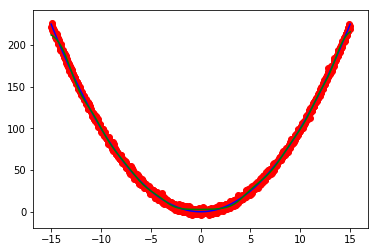

In [3]:
x_ = np.linspace(-15, 15, 160) # define axis

pred_x = np.reshape(x_, [160, 1]) # [160, ] -> [160, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.plot(x_, x_**2, color = 'b') # plot original function
plt.scatter(x, y, color = 'r') # plot training data
plt.plot(pred_x, pred_y, 'g') # plot network output

#### In the above code, play on the hyperparameters, number of samples, and increase noise.

In [ ]:
#changed n to 200

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

#http://www.machinelearningtutorial.net/2017/01/28/python-scikit-simple-function-approximation/

#don't for get the seed, solutions are differnig without a set seed
np.random.seed(3)
n = 2000
x = np.random.uniform(-15, 15, size = n)
#y is a predictor for x, the random thing is noise added to the data
y = x**2 + 200*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

#if verbose false, results won't show
clf = MLPRegressor(alpha=0.001, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')

"""
clf = MLPRegressor(alpha=0.1, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')
"""
a = clf.fit(X, y)

mlp.fit(X_)

### <font color='red'>change n to 200, converged faster, before max n, then green was correct</font>

### <font color='red'>changed n back to 20 then changed noise from 2 to 200*, would not converge, green again overfit</font>

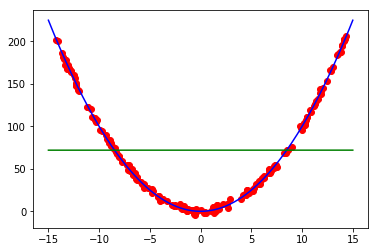

In [13]:
x_ = np.linspace(-15, 15, 160) # define axis

pred_x = np.reshape(x_, [160, 1]) # [160, ] -> [160, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.plot(x_, x_**2, color = 'b') # plot original function
plt.scatter(x, y, color = 'r') # plot training data
plt.plot(pred_x, pred_y, 'g') # plot network output